### **𝐏𝐮𝐛𝐥𝐢𝐜 𝐏𝐞𝐫𝐜𝐞𝐩𝐭𝐢𝐨𝐧𝐬 𝐨𝐟 𝐇𝐞𝐚𝐫𝐢𝐧𝐠 𝐇𝐞𝐚𝐥𝐭𝐡 𝐃𝐚𝐭𝐚𝐬𝐞𝐭 𝐌𝐋**

### ***The Hearing Wellness Survey 2025 captures public perceptions, habits, and awareness around hearing health, with a focus on the growing risks from prolonged earphone and headphone use. Conducted among diverse age groups, the survey explores how individuals value hearing, their experiences with hearing challenges, and their openness to digital solutions for hearing care.***

### **Project Structure**
### ***1) Import Essential Libraries***
### ***2) Load The Data***
### ***3) Classification & Pipeline***
### ***4) Model Comparison***
### ***5) Hyperparameter Tuning***
### ***6) Feature Importance***
### ***7) Cross-Validation for Reliable Scores***

### **Ｉｍｐｏｒｔ Ｅｓｓｅｎｔｉａｌ Ｌｉｂｒａｒｉｅｓ**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### **ＬＯＡＤ ＴＨＥ ＤＡＴＡ**

In [2]:
data = pd.read_csv("D:/PYTHON 2/ᗪᗩTᗩ/AUGUST/2025 Hearing Wellness Survey DataSet/Hearing well-being Survey Report.csv")
data.head()

,Perceived_Hearing_Meaning,Hearing_FOMO,Hearing_Test_Barrier,Missed_Important_Sounds,Left_Out_Due_To_Hearing,Daily_Headphone_Use,Belief_Early_Hearing_Care,Last_Hearing_Test_Method,Interest_in_Hearing_App,Desired_App_Features,Awareness_on_hearing_and_Willingness_to_invest,Paid_App_Test_Interest,Age_group,Ear_Discomfort_After_Use
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No


### **Ｃｌａｓｓｉｆｉｃａｔｉｏｎ ＆ Ｐｉｐｅｌｉｎｅ**

In [3]:
y = data["Interest_in_Hearing_App"]

In [4]:
X = data.drop(columns=["Interest_in_Hearing_App", "Desired_App_Features"])

In [5]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [6]:
Preprocessor = ColumnTransformer(transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),("num", "passthrough", num_cols)])

In [7]:
clf = Pipeline(steps=[("preprocessor", Preprocessor),("model", RandomForestClassifier(random_state=42))])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
y = data["Interest_in_Hearing_App"].replace({"Yes, that would be helpful": "Yes","No, I don't think it's necessary": "No"})

In [10]:
y_counts = y.value_counts()
rare_classes = y_counts[y_counts < 2].index

mask = ~y.isin(rare_classes)
X = X[mask].reset_index(drop=True)
y = y[mask].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


,precision,recall,f1-score,support
"Maybe, if it's easy to use",0.450000,0.500000,0.473684,36.000000
No,0.272727,0.200000,0.230769,15.000000
Yes,0.407407,0.407407,0.407407,27.000000
accuracy,0.410256,0.410256,0.410256,0.410256
macro avg,0.376712,0.369136,0.370620,78.000000
weighted avg,0.401166,0.410256,0.404028,78.000000


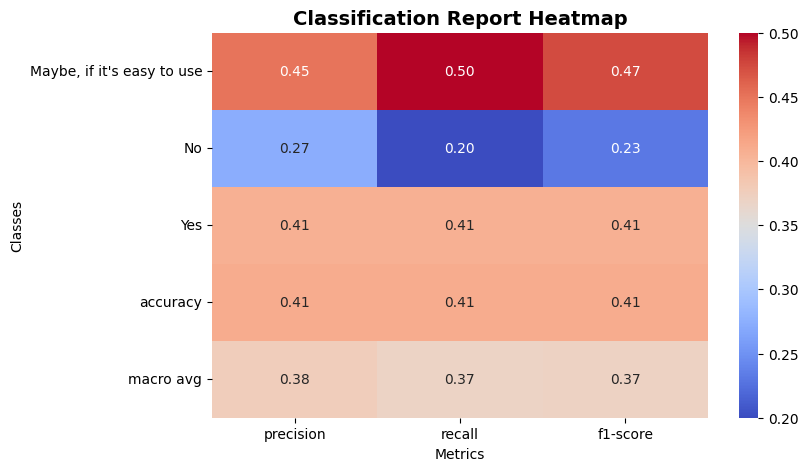

In [12]:
y_predict = clf.predict(X_test)
Report_Dict = classification_report(y_test, y_predict, output_dict=True)
Report_Data = pd.DataFrame(Report_Dict).transpose()
display(Report_Data)

Metrics_Data = Report_Data.drop(columns=["support"], errors="ignore")

plt.figure(figsize=(8,5))
sns.heatmap(Metrics_Data.iloc[:-1, :], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report Heatmap", fontsize=14, weight="bold")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()

<Figure size 800x500 with 0 Axes>

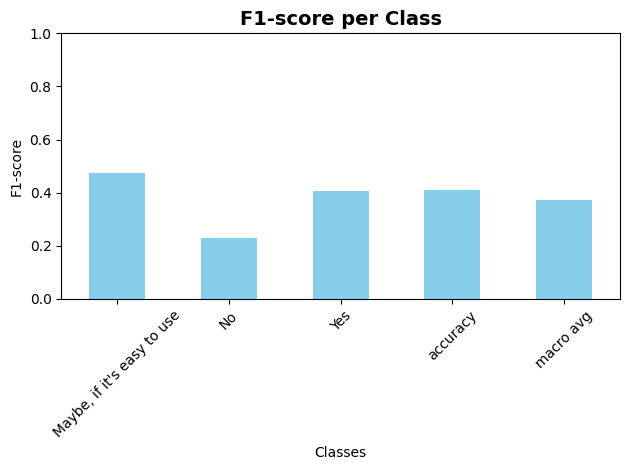

In [13]:
plt.figure(figsize=(8,5))
Report_Data.iloc[:-1].plot(kind="bar", y="f1-score", legend=False, color="skyblue")
plt.title("F1-score per Class", fontsize=14, weight="bold")
plt.ylabel("F1-score")
plt.xlabel("Classes")
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

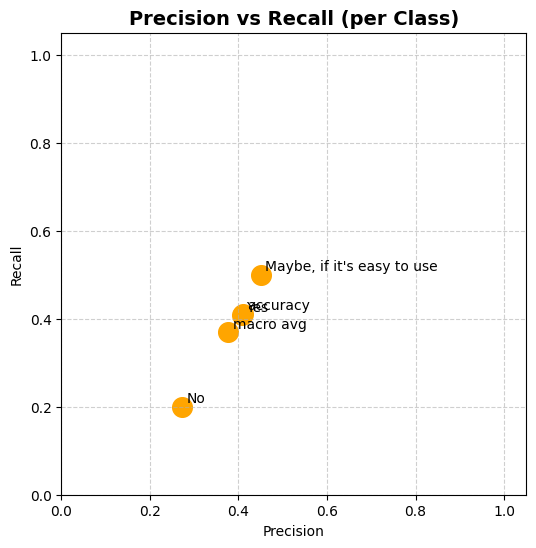

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(Report_Data.iloc[:-1]["precision"], Report_Data.iloc[:-1]["recall"], s=200, c="orange")
for i, label in enumerate(Report_Data.index[:-1]):
    plt.text(Report_Data["precision"].iloc[i] + 0.01,Report_Data["recall"].iloc[i] + 0.01,label)
plt.title("Precision vs Recall (per Class)", fontsize=14, weight="bold")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### **Ｍｏｄｅｌ Ｃｏｍｐａｒｉｓｏｎ**

In [19]:
Models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
}

### **Ｈｙｐｅｒｐａｒａｍｅｔｅｒ Ｔｕｎｉｎｇ （ＧｒｉｄＳｅａｒｃｈＣＶ ／ ＲａｎｄｏｍｉｚｅｄＳｅａｒｃｈＣＶ**

In [18]:
Grid = {"model__n_estimators": [100, 200, 500],"model__max_depth": [None, 10, 20],"model__min_samples_split": [2, 5, 10]}

Grid_Search = GridSearchCV(clf, Grid, cv=5, scoring="f1_macro")
Grid_Search.fit(X_train, y_train)
Results = pd.DataFrame(Grid_Search.cv_results_)
display(Results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.222282,0.027799,0.016666,0.002087,None,2,100,"{'model__max_depth': None, 'model__min_samples...",0.464710,0.408734,0.417017,0.433030,0.510989,0.446896,0.037327,25
1,0.375121,0.017025,0.022583,0.002458,None,2,200,"{'model__max_depth': None, 'model__min_samples...",0.477778,0.431812,0.412750,0.454093,0.458071,0.446901,0.022467,24
2,0.908814,0.033854,0.038568,0.004172,None,2,500,"{'model__max_depth': None, 'model__min_samples...",0.465873,0.434863,0.503210,0.473660,0.485648,0.472651,0.022705,13
3,0.166354,0.005432,0.013510,0.002662,None,5,100,"{'model__max_depth': None, 'model__min_samples...",0.484666,0.474192,0.508395,0.482861,0.531589,0.496341,0.020958,2
4,0.320613,0.004305,0.019937,0.001982,None,5,200,"{'model__max_depth': None, 'model__min_samples...",0.430085,0.447516,0.459259,0.489459,0.489674,0.463198,0.023446,17


### **Ｆｅａｔｕｒｅ Ｉｍｐｏｒｔａｎｃｅ （ｔｏ ｓｅｅ ｗｈｉｃｈ ｓｕｒｖｅｙ ｑｕｅｓｔｉｏｎｓ ｍａｔｔｅｒ ｍｏｓｔ**

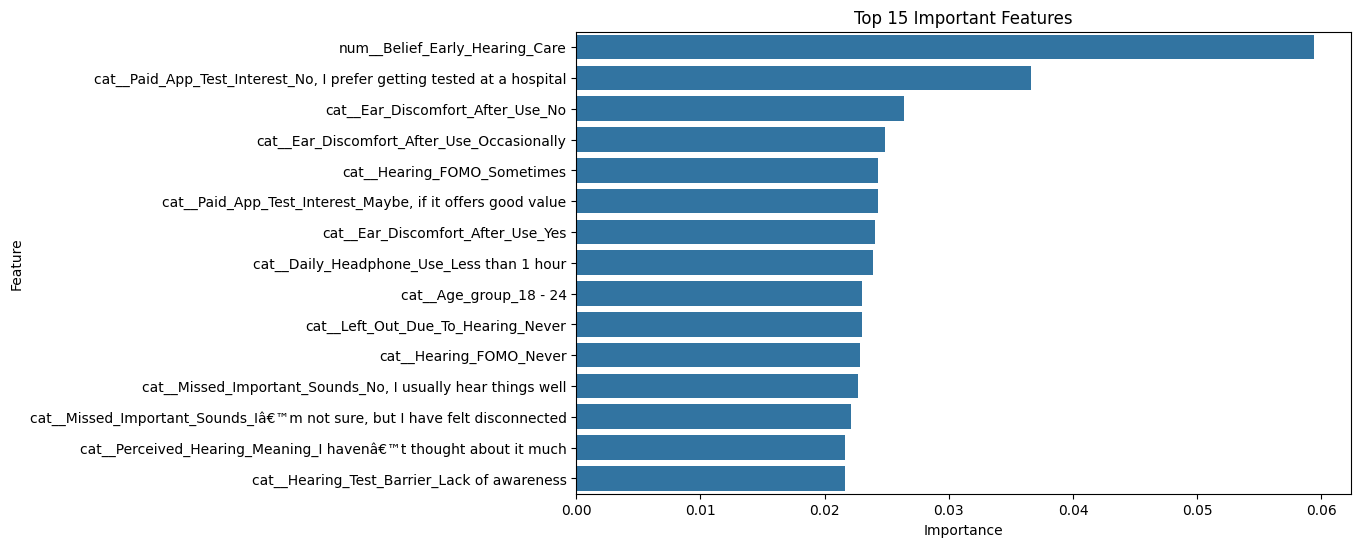

In [17]:
clf.fit(X_train, y_train)
Feature_Names = clf.named_steps["preprocessor"].get_feature_names_out()
Importances = clf.named_steps["model"].feature_importances_

Feat = pd.DataFrame({"Feature": Feature_Names,"Importance": Importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=Feat.head(15))
plt.title("Top 15 Important Features")
plt.show()

### **Ｃｒｏｓｓ－ｖａｌｉｄａｔｉｏｎ ｆｏｒ Ｒｅｌｉａｂｌｅ Ｓｃｏｒｅｓ**

In [ ]:
Scores = cross_val_score(clf, X, y, cv=5, scoring="f1_macro")
Cross_Results = pd.DataFrame({"Fold": range(1, len(Scores)+1),"F1 Score": Scores})
Cross_Results.loc["Mean"] = ["Average", Scores.mean()]
display(Cross_Results)

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(Scores)+1), Scores, marker="o", linestyle="--", label="F1 Score")
plt.axhline(Scores.mean(), color="red", linestyle=":", label=f"Mean = {Scores.mean():.3f}")
plt.title("Cross-Validation F1 Scores", fontsize=14, weight="bold")
plt.xlabel("Fold")
plt.ylabel("F1_macro")
plt.legend()
plt.ylim(0,1)
plt.show()